# Workbook 2 Song Popularity Project
focused on creating function for modules and new methods on modeling

In [ ]:
# update modules during working process
import importlib
importlib.reload(w)

### imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set(rc={'axes.facecolor':'peachpuff', 'figure.facecolor':'ivory'})
#sns.set_context('paper', font_scale = 2)
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor

from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures
from math import sqrt

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures

import wrangle as w

## Acquire
Data was acquired from Kaggle https://www.kaggle.com/datasets/yasserh/song-popularity-dataset.
Original source is unknow but it is believed to come from spotify.

In [3]:

#import os
def fresh_data():
    '''
    This reads the zillow 2017 properties data from the Codeup db into a df.
    '''
    # Read in DataFrame from csv file.
    df = pd.read_csv(filename)
    return df

def acquire_data(new = False):
    '''
    Obtains the data from the csv file. 
    Next interation reads the data from the saved file
    Returns: pandas DataFrame
    '''
    filename = 'song_data.csv'
    # obtain cvs file
    if (os.path.isfile(filename) == False) or (new == True):
        df = fresh_data()
        #save as csv locally
        df.to_csv(filename,index=False)

    #cached data
    else:
        df = pd.read_csv(filename)
    
    return df
    

In [4]:
# test function in notebook shape is (18835,15)
#df = acquire_data()

In [5]:
# teat function as module---> result is the same shape (18835, 15)
df = w.acquire_data()

In [6]:
df.shape

(18835, 15)

In [7]:
df.head(10)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
5,Bring Me To Life,80,235893,0.008950,0.316,0.945,0.000002,4,0.3960,-3.169,0,0.1240,189.931,4,0.320
6,Last Resort,81,199893,0.000504,0.581,0.887,0.001110,4,0.2680,-3.659,0,0.0624,90.578,4,0.724
7,Are You Gonna Be My Girl,76,213800,0.001480,0.613,0.953,0.000582,2,0.1520,-3.435,1,0.0855,105.046,4,0.537
8,Mr. Brightside,80,222586,0.001080,0.330,0.936,0.000000,1,0.0926,-3.660,1,0.0917,148.112,4,0.234
9,Sex on Fire,81,203346,0.001720,0.542,0.905,0.010400,9,0.1360,-5.653,1,0.0540,153.398,4,0.374


# Data Dictionary

Feature |Type |Description
 :--- | :--- | :--- |
song_name |object | The name of the song|
 **song_popularity** | int64|TARGET: Song Popularity 0-100, The larger the number the more popular the song|
 song_duration_ms| int 64| how long the song is in miliseconds|
 acousticness|float 64|A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic|
 danceability|float 64| how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable |
 energy|float 64|Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity|
 instrumentalness|float 64 | Predicts whether a track contains no vocals the closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
 key|int 64|The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C?/D?, 2 = D, and so on. If no key was detected, the value is -1.|
 liveness|float 64|Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
 loudness|float 64|The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db|
 audio_mode|int 64|Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.|
 speechiness|float 64|Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.|
 tempo|float 64|The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration|
 time_signature| int 64|
 audio_valence|float 64|A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).|indicate how many beats are in each measure of a piece of music, as well as which note value is counted as a beat. |


## Clean and Prep

* The only prep work needed so far is to drop duplicates
* Null values were not found 
* Outliers were not taken out for this iteration 

### Drop Duplicated columns

In [8]:
def data_prep(df):
    '''
    data_prep takes in dataframe and drops duplicates
    Returns cleaned dataframe
    '''
    df.drop_duplicates(inplace=True)
    
    return df
    

In [9]:
# test function in notebook shape is (14926,15)
#df = data_prep(df)

In [10]:
# test function as module---> Results df is the same shape 
df = w.data_prep(df)

In [11]:
df.shape

(14926, 15)

In [12]:
df.dtypes

song_name            object
song_popularity       int64
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object

In [13]:
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,14926.000000,1.492600e+04,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000
mean,48.750904,2.189496e+05,0.270453,0.624514,0.639763,0.092067,5.301152,0.180435,-7.677232,0.631917,0.099419,121.105007,3.952968,0.526967
std,20.379465,6.234080e+04,0.298117,0.158081,0.221756,0.240451,3.592616,0.145097,4.018670,0.482300,0.103546,29.044644,0.316702,0.247758
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,1.839435e+05,0.023600,0.524000,0.496000,0.000000,2.000000,0.093000,-9.389500,0.000000,0.037200,98.125000,4.000000,0.332000
50%,52.000000,2.118455e+05,0.139000,0.636000,0.672000,0.000021,5.000000,0.122000,-6.750500,1.000000,0.054100,120.016000,4.000000,0.527000
75%,63.750000,2.447200e+05,0.458000,0.740000,0.818000,0.005105,8.000000,0.224000,-4.991000,1.000000,0.113000,139.940750,4.000000,0.727750
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


# Split Data for Explore

In [14]:
def split_data(df):
    '''
    split_data takes in data Frame and splits into  train , validate, test.
    The split is 20% test 80% train/validate. Then 30% of 80% validate and 70% of 80% train.
    Aproximately (train 56%, validate 24%, test 20%)
    Returns train, validate, and test 
    '''
    # split test data from train/validate
    train_and_validate, test = train_test_split(df, random_state=123, test_size=.2)

    # split train from validate
    train, validate = train_test_split(train_and_validate, random_state=123, test_size=.3)
                                   
    return train, validate, test

In [15]:
# test function in notebook shape is (8358, 15)
#train, _, _ = split_data(df)

In [16]:
# test function in module --> result shape is (8358, 15) the same
train, _, _ = w.split_data(df)

In [17]:
train.shape

(8358, 15)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8358 entries, 1335 to 1197
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         8358 non-null   object 
 1   song_popularity   8358 non-null   int64  
 2   song_duration_ms  8358 non-null   int64  
 3   acousticness      8358 non-null   float64
 4   danceability      8358 non-null   float64
 5   energy            8358 non-null   float64
 6   instrumentalness  8358 non-null   float64
 7   key               8358 non-null   int64  
 8   liveness          8358 non-null   float64
 9   loudness          8358 non-null   float64
 10  audio_mode        8358 non-null   int64  
 11  speechiness       8358 non-null   float64
 12  tempo             8358 non-null   float64
 13  time_signature    8358 non-null   int64  
 14  audio_valence     8358 non-null   float64
dtypes: float64(9), int64(5), object(1)
memory usage: 1.0+ MB


In [19]:
train.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,8358.000000,8.358000e+03,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000
mean,48.646925,2.196057e+05,0.272077,0.623732,0.640336,0.092038,5.260708,0.181391,-7.694547,0.634841,0.100226,121.451581,3.955492,0.527123
std,20.357235,6.453181e+04,0.300658,0.157972,0.222402,0.240468,3.589351,0.145189,4.024593,0.481504,0.104200,29.016411,0.311988,0.246605
min,0.000000,2.618600e+04,0.000001,0.059400,0.001630,0.000000,0.000000,0.011900,-36.729000,0.000000,0.022800,46.591000,1.000000,0.023000
25%,37.000000,1.846038e+05,0.023225,0.524000,0.495000,0.000000,2.000000,0.093100,-9.423250,0.000000,0.037200,98.275750,4.000000,0.333000
50%,52.000000,2.123195e+05,0.139000,0.634000,0.674000,0.000023,5.000000,0.122000,-6.761500,1.000000,0.054200,120.050500,4.000000,0.526000
75%,63.000000,2.453860e+05,0.459000,0.739000,0.818000,0.005380,8.000000,0.229000,-5.024000,1.000000,0.115000,139.992500,4.000000,0.728000
max,100.000000,1.799346e+06,0.996000,0.987000,0.997000,0.997000,11.000000,0.983000,1.585000,1.000000,0.941000,242.318000,5.000000,0.982000


# Explore

* create a sub-categories for songs that are rate as 60 or above ther are about 2733 songs in this section.
* This is about 32.7 % of the total data

In [20]:
songs_60and_above = train[train.song_popularity>=60]

In [21]:
songs_60and_above.shape[0]/train.shape[0]

0.3269921033740129

# What does the distribution of Song Popularity Score look like?

<AxesSubplot:xlabel='song_popularity', ylabel='Density'>

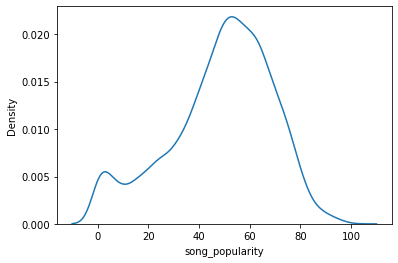

In [25]:
sns.kdeplot(train['song_popularity'])

<AxesSubplot:xlabel='song_popularity', ylabel='Count'>

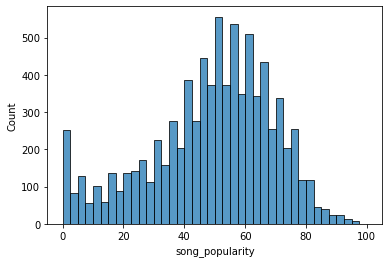

In [24]:

sns.histplot(train.song_popularity)


In [92]:
figure(figsize=(3, 2), dpi=80)
graph = sns.distplot( a=train["song_popularity"], hist=True, kde=True, rug=False,
             hist_kws={"color": "gray", "alpha": 0.65, "linewidth": 2,"fill":True,"edgecolor":'black'},
             kde_kws={"color": "skyblue", "alpha": 0.8, "linewidth": 3, "shade": True})
graph.axvline(train.song_popularity.mean(), color = 'red', linewidth = 1.5, linestyle="--",label="Mean Song Popularity Score" )
graph.legend(loc=0)

NameError: name 'figure' is not defined

In [78]:
train.song_popularity.mean()

48.64692510169897

# Is there a correlation between loudness and Song popularity score?


## all songs

In [ ]:
plt.figure(figsize=(8, 8), dpi=100)
sns.scatterplot(data=train, x="audio_valence", y="energy", size="song_popularity",legend=False, sizes=(.01, 100), alpha=.2)
plt.title("Train data Valence vs Energy")
plt.show()

In [ ]:
#for col in columns:
#    for col2 in columns:
#        plt.figure(figsize=(6, 6), dpi=60)
#        sns.scatterplot(data=train, x=col,y=col2, hue ='song_popularity',palette='Blues')

In [ ]:
# pearsonr r for continuous variables
features = []
for i in columns:
    α =0.05
    corr, p = stats.pearsonr(train[i], train.song_popularity)
    print('_____________________________________________________')
    print('HYPOTHESIS')
    print(f'H0: There is no significant difference between pop in different {i}')
    print(f'Ha:(There is a significant difference between pop in different {i}')
    print(f'{i} correlation {corr}, p-val{p}')
    if p < α:
        print('We reject the null hypothesis.')
        print(f'There is a correlation between pop and {i}')
        features.append(i)
    else:
        print('We fail to reject the null hypothesis.')
        print(f'There is no correlation between pop and {i}')

In [ ]:
features

In [ ]:
sns.kdeplot(y=train.song_popularity,hue='audio_valence',data=train,legend=False);

In [ ]:
sns.lineplot(train.song_popularity,train.audio_valence);

In [ ]:
plt.figure(figsize=(8, 8))
for col in features:
    sns.lineplot(train.song_popularity,train[col])
    plt.show();

In [ ]:
for col in features:
    sns.regplot(x=col, y='song_popularity', data=train,color='olive',scatter_kws={'s': 100, 'alpha': 0.5, 'color': 'plum'})
    plt.show();
                

## Top  in popularity

In [ ]:
train.sort_values(by='song_popularity', ascending=False)

In [ ]:
pop_top= train[train.song_popularity>=75]

In [ ]:
plt.figure(figsize=(8, 8), dpi=100)
sns.scatterplot(data=pop_top, x="audio_valence", y="energy", size="song_popularity",legend=False, sizes=(1, 25), alpha=.6)
plt.title("Pop is 90& above data Valence vs Energy")
plt.show()

In [ ]:
for col in features:
    sns.regplot(x=col, y='song_popularity', data=pop_top,color='olive',scatter_kws={'s': 100, 'alpha': 0.5, 'color': 'plum'})
    plt.show();

# Low popularity

In [ ]:
pop_low= train[train.song_popularity<=25]

In [ ]:
plt.figure(figsize=(8, 8), dpi=100)
sns.scatterplot(data=pop_low, x="audio_valence", y="energy", size="song_popularity",legend=False, sizes=(1, 25), alpha=.6)
plt.title("Pop is 90& above data Valence vs Energy")
plt.show()

In [ ]:
for col in features:
    sns.regplot(x=col, y='song_popularity', data=pop_low,color='olive',scatter_kws={'s': 100, 'alpha': 0.5, 'color': 'plum'})
    plt.show();

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr(method='spearman')[['song_popularity']].sort_values(by='song_popularity', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Purples')
heatmap.set_title('Features Correlating with song_popularity', fontdict={'fontsize':18}, pad=16);

# Modeling

### Prep data for modeling

In [ ]:
def data_modeling(df,target):
    train,test,validate = split_data(df)
    y_train = train[target]
    X_train = train.drop(columns ={target,'song_name'})
    y_validate = validate[target]
    X_validate = validate.drop(columns ={target,'song_name'})
    y_test = test[target]
    X_test = test.drop(columns ={target,'song_name'})
    return y_train, X_train, y_validate,X_validate, y_test, X_test
    
    

In [ ]:
y_train, X_train, y_validate,X_validate, y_test, x_test = data_modeling(df, 'song_popularity')

In [ ]:
plt.hist(y_train);

In [ ]:
pred_train =pd.DataFrame()

### First model Linear Regression

In [ ]:
lm = LinearRegression(normalize=True)
ols_model = lm.fit(X_train, y_train)

In [ ]:
pred_train['ols_model']=lm.predict(X_train)

In [ ]:
RMSE_ols_model = sqrt(mean_squared_error(y_train, pred_train.ols_model))


In [ ]:
RMSE_ols_model

* Root Mean Square Error for OLS model is slightly lower than Baseline mode and Baseline mean.

### Baseline

In [ ]:
y_train.mean()

In [ ]:
y_train.mode()

In [ ]:
y_train.median()

* Mode was selected as the statistical measure for baseline. Mode is the number that appears the most and in this dataset by choosing 53 as song popularity we would guess the most correct than by choosing any other number.

In [ ]:
baseline_mode =y_train.mode()
baseline_mode[0]

In [ ]:
baseline_mean = y_train.mean()
baseline_mean

In [ ]:
pred_train

In [ ]:
pred_train['baseline_mode']=baseline_mode[0]

In [ ]:
pred_train['baseline_mean'] = baseline_mean

In [ ]:
RMSE_baseline_mode_train = sqrt(mean_squared_error(y_train, pred_train.baseline_mode))
RMSE_baseline_mean_train = sqrt(mean_squared_error(y_train, pred_train.baseline_mean))

In [ ]:
RMSE_baseline_mode_train, RMSE_baseline_mean_train

In [ ]:
features.remove('song_popularity')

## Using Features

In [ ]:
features.remove('song_popularity')

In [ ]:
features

In [ ]:
def data_modeling_features(df,target, features):
    
    train,test,validate = split_data(df)
    y_train = train[target]
    X_train = train[features]
    y_validate = validate[target]
    X_validate = validate[features]
    y_test = test[target]
    X_test = test[features]
    return y_train, X_train, y_validate,X_validate, y_test, X_test

In [ ]:
y_train, X_train, y_validate,X_validate, y_test, X_test=data_modeling_features(df,'song_popularity',features)

In [ ]:
ols_model = lm.fit(X_train, y_train)

In [ ]:
pred_train['ols_model_features']=lm.predict(X_train)

In [ ]:
RMSE_ols_model_features = sqrt(mean_squared_error(y_train, pred_train.ols_model_features))

In [ ]:
RMSE_ols_model_features

In [ ]:
# create the model 
lars = LassoLars(alpha=1.0)

lars.fit(X_train, y_train)

# predict train
pred_train['pred_lars_features'] = lars.predict(X_train)



In [ ]:
RMSE_lars_model_features = sqrt(mean_squared_error(y_train, pred_train.pred_lars_features))

In [ ]:
RMSE_lars_model_features

# XGBoost

In [ ]:

import xgboost as xg
  
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
  
# Fitting the model
xgb_r.fit(X_train, y_train)
  
# Predict the model
pred_train['pred_xgb_features'] = xgb_r.predict(X_train)
  
# RMSE Computation
rmse_xgb = sqrt(mean_squared_error(y_train, pred_train.pred_xgb_features))
print("RMSE : % f" %(rmse_xgb))

In [ ]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(train.song_popularity, color='blue', alpha=.5, label="Actual ")
plt.hist(pred_train.ols_model, color='red', alpha=.5, label="Model: LinearRegression")
plt.hist(pred_train.ols_model_features, color='yellow', alpha=.5, label="Model: LinearRegression Features")
plt.hist(pred_train.pred_xgb_features, color='green', alpha=.5, label="Model XGBosst")
plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.legend()
plt.show()

* XGBoost reduced RMSE by 2.69 units of song popularity. 100 being the top songs and 1 the lowest.


In [ ]:
18.125547-20.816260532584163
